# Non-trivial Band Topology and the Chern Number
### Christina Lee
### Category:  Graduate
### Topological Physics Series
* [Quantum Anomolous Hall Effect and the Chern Number](../Graduate/Chern-Number.ipynb)
* [SSH Model and the Winding Number](../Graduate/Winding-Number.ipynb)
* [Simplex](../Graduate/Simplex.ipynb)

## Overview

A Chern number tells us whether something non-trivial is going on in the wavefunction and lets us distinguish between different topological phases.

Now let me clarify what I mean when I say "non-trivial".

Normally, when we are studying materials, we move from a spatial dependence for the wavefunction to a momentum dependence across a Brillouin Zone.

When we are in a non-trivial phase, we can't define a wavefunction across the entire Brillouin Zone at the same time. We can rewrite the wavefunction to cover the area that didn't work before, but then some other section isn't well-defined.

To be clear, the physics is well defined everywhere, and every way we write the wavefunction gives the same physics. The problem lies in our inability to write down a single "chart" for the whole Zone. This conundrum is similar to the problem with plotting a globe in 2 dimensions. We always have to make cuts, but the entire globe can be covered by "charts" that make up an "atlas".


## Our Model

A page of a Review of Modern Physics behemoth, "Classification of topological quantum matter with symmetries" [1], presented this model below. It inspired me to dig deeper and fill in the details.   They attributed this model as describing the Quantum Anomolous Hall Effect, QAHE, but this form describes a wide variety topological phenomena.  

\begin{equation}
H(k) = R_0(k) \sigma_0 + \vec{R}(k) \cdot \vec{\sigma}
\end{equation}
\begin{equation}
= R_0(k) \sigma_0 + R_1(k) \sigma_1 + R_2(k) \sigma_2 + R_3(k) \sigma_3
\end{equation}
where $\sigma_0$ is the identity matrix and $\sigma_i$ are simply the Pauli matrices. 
Combining the terms, $H(k)$ is a 2x2 matrix.  
\begin{equation}=
\begin{pmatrix}
R_0 + R_3 & R_1 -i R_2 \\
R_1 + i R_2 & R_0 - R_3 
\end{pmatrix}
\end{equation}
The wavefunction will then be 2-valued.  This could denote two sublattices, or two different types of particles.

While we could use any values for $\vec{R}(k)$, we will use
\begin{equation}
\vec{R}(k) = \begin{pmatrix}
-2 \sin k_x \\
-2 \sin k_y \\
\mu +2 \sum_{x,y} \cos k_i \\
\end{pmatrix}
\end{equation}
as it's a fairly simple form that gives us the physics we want and exhibits phase transitions depending on the value of $\mu$.  I set $\mu$ as $1$ early on.  Go through the notebook with that value, then go through the notebook with $\mu = -5, -1, 1, 5$.  

In [1]:
using Plots
using LaTeXStrings
gr()

Plots.GRBackend()

In [4]:
μ=1

labels=[L"-\pi",L"-\pi/2",L"0",L"\pi/2",L"\pi"]
ticks=[-π,-π/2,0,π/2,π];

ks=range(-π,stop=π,length=314)
l=length(ks)

ka=Array{Array{Float64},2}(undef,l,l)
for ii in 1:l
    x=ks[ii]
    for jj in 1:l
        ka[ii,jj]=[x,ks[jj]]
    end
end   

In [5]:
function R0(k::Array)
    return 0
end

function R1(k::Array)
    return -2*sin(k[1])
end

function R2(k::Array)
    return -2*sin(k[2])
end

function R3(k::Array)
    return μ+2*cos(k[1])+2*cos(k[2])
end

R3 (generic function with 1 method)

In [6]:
function R(k::Array)
    return sqrt(R1(k)^2+R2(k)^2+R3(k)^2)
end

R (generic function with 1 method)

## Band Diagram

First, let's just take a look at the energy spectrum.  For each $k$, we calculate the eigenvalues of the 2x2 matrix Hamiltonian.

To make the calculation simpler, I denote the function $R$ as
\begin{equation}
R=\sqrt{R_1^2+R_2^2+R_3^2}
\end{equation}
With that, energy can simply be written as
\begin{equation}
\lambda= R_0 \pm R
\end{equation}
$R_0$ moves the entire spectrum up and down but doesn't effect the gap, and won't affect the physics.  That term won't even factor into the eigenvectors.

In [7]:
function λp(k::Array{Float64})
    return R0(k)+R(k)
end

function λm(k::Array{Float64})
    return R0(k)-R(k)
end

λm (generic function with 1 method)

Notation Note:  I denote the Array evaluation of a function as the function name followed by 'a'.

In [8]:
λpa=zeros(Float64,l,l)
λma=zeros(Float64,l,l)

for ii in 1:l
    for jj in 1:l
        λpa[ii,jj]=λp(ka[ii,jj])
        λma[ii,jj]=λm(ka[ii,jj])
    end
end

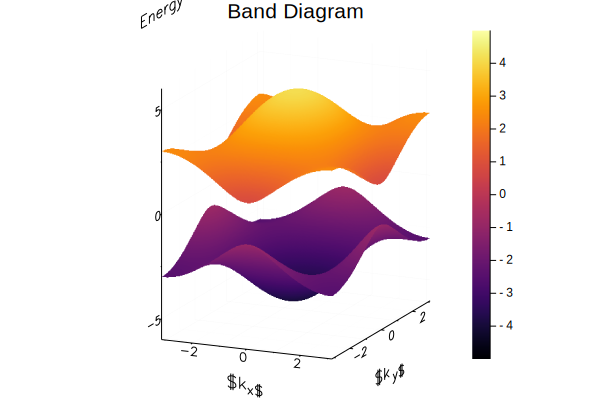

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not refelct all series correctly.
└ @ Plots /home/shaula/.julia/packages/Plots/Ih71u/src/backends/gr.jl:483


In [10]:
surface(ks,ks,λpa)
surface!(ks,ks,λma)
plot!(xticks= (ticks,labels),
yticks=(ticks,labels),
xlabel=L"k_x",
ylabel=L"k_y",
zlabel="Energy",
title="Band Diagram")

## Eigenvectors

To find the eigenvectors, we find the nullspace of the following matrix,
\begin{equation}
\begin{vmatrix}
R_0 +R_3 - R_0 \mp R & R_1 - i R_2 \\
R_1 + i R_2 & R_0 - R_3 -R_0 \mp R \\
\end{vmatrix}
\end{equation}

Take the bottom row. Second column value multiples first column and first column value multiples second column.
\begin{equation}
\begin{pmatrix}
\pm R + R_3 \\
R_1 + i R_2  
\end{pmatrix}
\end{equation}

And now we need to normalize the state
\begin{equation}
\frac{1}{\sqrt{2 R \left( R \pm R_3 \right) }}
\begin{pmatrix}
\pm R + R_3\\
R_1 + i R_2
\end{pmatrix}
\end{equation}
In low energy, just the minus state will be occupied (lower energy), but it has a singularity at $\vec{R} = ( 0 ,0, R) $. 

We have two complex numbers in this vector, and thus four things to plot $r_1, \theta_1, r_2, \theta_2$,
\begin{equation}
|\psi \rangle =
\begin{pmatrix}
r_1 e^{i \theta_1} \\
r_2 e^{i \theta_2} 
\end{pmatrix}
\end{equation}

If we chose to create our vector from the top row instead,
\begin{equation}
\begin{pmatrix}
R_1 -i R_2 \\
- R_3 \mp R
\end{pmatrix}
\end{equation} 
and normalized
\begin{equation}
\frac{1}{\sqrt{2 R \left( R \mp R_3 \right) }} 
\begin{pmatrix}
R_1 - i R_2 \\
\pm R - R_3
\end{pmatrix}
\end{equation}
But the minus state for this one has a singularity at $\vec{R} = (0,0, -R )$.  

We can move where the singularity is, but we can't get rid of it.  The problem-point doesn't show up in the physics, only in the wavefunction representation of it.  We cannot well represent the state across the entire Brillouin Zone at the same time.  This problem occurs because we have a topologically non-trivial state and a non-zero Chern number.

In [11]:
function up1(k::Array)
    front=1/sqrt(2*R(k)*(R(k)+R3(k)))
    return front*(R(k)+R3(k))
end

function up2(k::Array)
    front=1/sqrt(2*R(k)*(R(k)+R3(k)))
    return front*(R1(k)+im*R2(k))
end

up=Function[]
push!(up,up1)
push!(up,up2)

2-element Array{Function,1}:
 up1
 up2

In [12]:
function um1(k::Array)
    front=1/sqrt(2*R(k)*(R(k)-R3(k)))
    return front*(-R(k)+R3(k))
end

function um2(k::Array)
    front=1/sqrt(2*R(k)*(R(k)-R3(k)))
    return front*(R1(k)+im*R2(k))
end

um=Function[]
push!(um,um1)
push!(um,um2)

2-element Array{Function,1}:
 um1
 um2

In [13]:
upa=zeros(Complex{Float64},2,l,l)
uma=zeros(Complex{Float64},2,l,l)

for ii in 1:l
    for jj in 1:l
        upa[1,ii,jj]=up[1](ka[ii,jj])
        upa[2,ii,jj]=up[2](ka[ii,jj])
        uma[1,ii,jj]=um[1](ka[ii,jj])
        uma[2,ii,jj]=um[2](ka[ii,jj])
    end
end

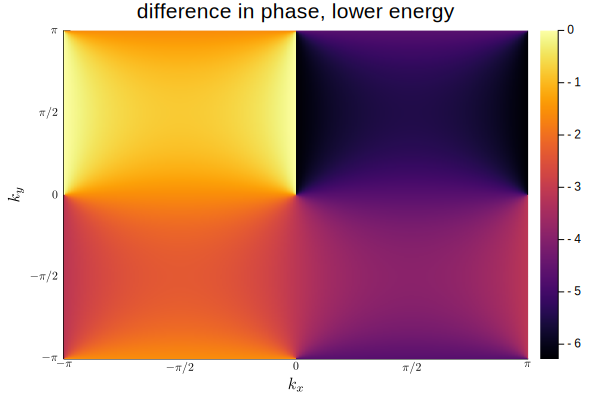

In [14]:
# Plotting θ2
heatmap(ks,ks,angle.(uma[2,:,:])-angle.(uma[1,:,:]))
plot!(xticks= (ticks,labels),
yticks=(ticks,labels),
xlabel=L"k_x",
ylabel=L"k_y",
title="difference in phase, lower energy")

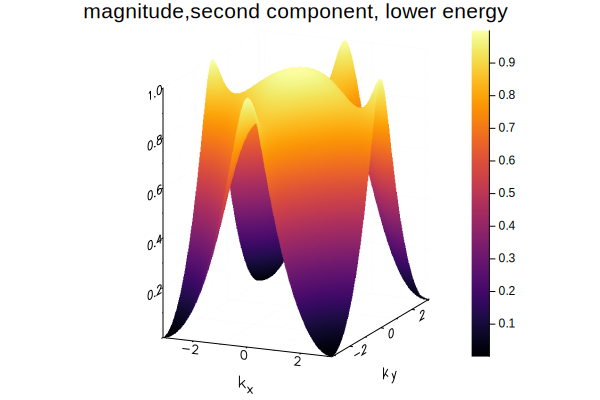

In [31]:
surface(ks,ks,abs2.(uma[2,:,:]))
plot!(xticks= (ticks,labels),
    yticks=(ticks,labels),
    xlabel="k_x", ylabel="k_y",
    title="magnitude,second component, lower energy")

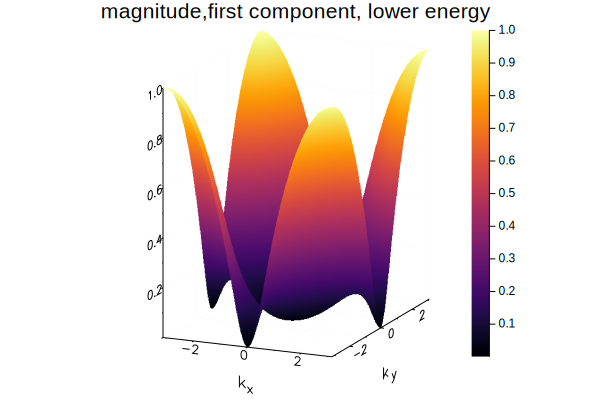

In [25]:
surface(ks,ks,abs2.(uma[1,:,:]))
plot!(xticks= (ticks,labels),
    yticks=(ticks,labels),
xlabel="k_x",
ylabel="k_y",
title="magnitude,first component, lower energy")

## Calculating the Connection

The first step in calculating the Chern number is evaluating the Berry Connection.  


\begin{equation}
\mathcal{A}^{i} = \langle u (k,r) | d_{i} u (k,r) \rangle
\end{equation}

Though $\mathcal{A}^i$ looks like a vector, it is not invariant under gauge tranformation.  If a wavefunction transforms as
\begin{equation}
| u(k,r) \rangle \rightarrow e^{-i \phi} | u(k,r) \rangle
\end{equation}
then the connection transforms as
\begin{equation}
\mathcal{A}^i \rightarrow \mathcal{A}^i -i \partial_i \phi
\end{equation}

Near the Dirac points in the Brillouin Zone, the wavefunction has quite a high curvature, which makes the numerical computation of the derivative prone to errors.  I tried numerical derivation but was unable to arrive at a correct, stable answer.  Therefore, I'm using the 'ForwardDiff' Package to take derivatives analytically.

In [24]:
using ForwardDiff

┌ Info: Precompiling ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]
└ @ Base loading.jl:1186


Before dealing with the physics, let's just look at the syntax for the package.  

Here's just an example of taking the gradient of $x^2$.

In [26]:
ex=x->ForwardDiff.gradient(t->t[1]^2,x)
ex([1])

1-element Array{Int64,1}:
 2

Now let's apply that syntax to our wavefunctions.  

The 'ForwardDiff' package seems to only work on purely real functions, so we have to take the derivative of the real and imaginary parts separately.  

In [27]:
dum1=kt->ForwardDiff.gradient(um1,kt)

Rdum2=kt->ForwardDiff.gradient(t->real(um2(t)),kt)
Idum2=kt->ForwardDiff.gradient(t->imag(um2(t)),kt)
dum2(k)=Rdum2(k)+im*Idum2(k)

dum2 (generic function with 1 method)

With the derivatives, we can now calculate the connection.

In [28]:
Amkx(k)=conj(um1(k))*dum1(k)[1]+conj(um2(k))*dum2(k)[1]
Amky(k)=conj(um1(k))*dum1(k)[2]+conj(um2(k))*dum2(k)[2]

Amky (generic function with 1 method)

In [30]:
Akxa=Array{Complex{Float64}}(undef,l,l)
Akya=Array{Complex{Float64}}(undef,l,l)
for ii in 1:l
    for jj in 1:l
        Akxa[ii,jj]=Amkx(ka[ii,jj])
        Akya[ii,jj]=Amky(ka[ii,jj])
    end
end

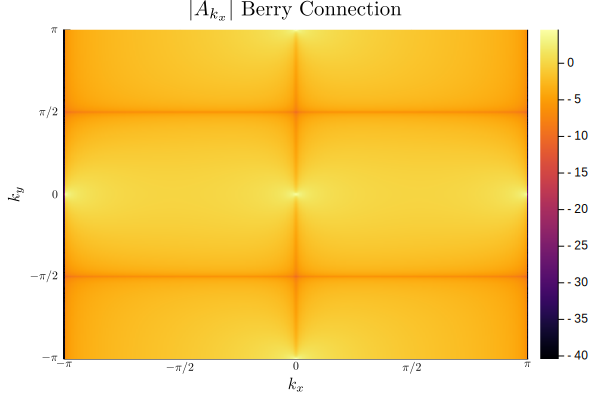

In [76]:
heatmap(ks,ks,log.(abs.(Akxa)))
plot!(xticks= (ticks,labels),
    yticks=(ticks,labels),
    xlabel=L"k_x",ylabel=L"k_y",
    title=L"|A_{k_x}| \textrm{ Berry Connection}")

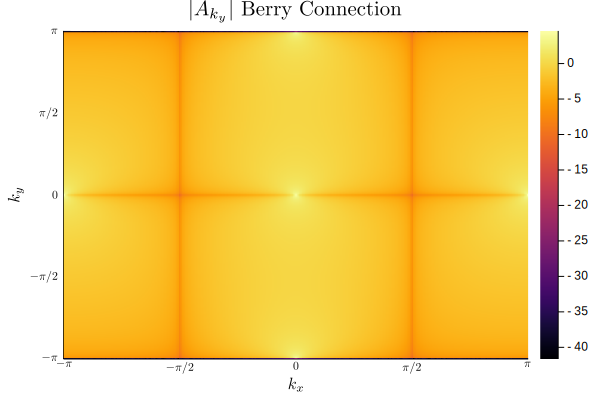

In [77]:
heatmap(ks,ks,log.(abs.(Akya)))
plot!(xticks= (ticks,labels),
    yticks=(ticks,labels),
    xlabel=L"k_x",ylabel=L"k_y",
    title=L"|A_{k_y}| \textrm{ Berry Connection}")

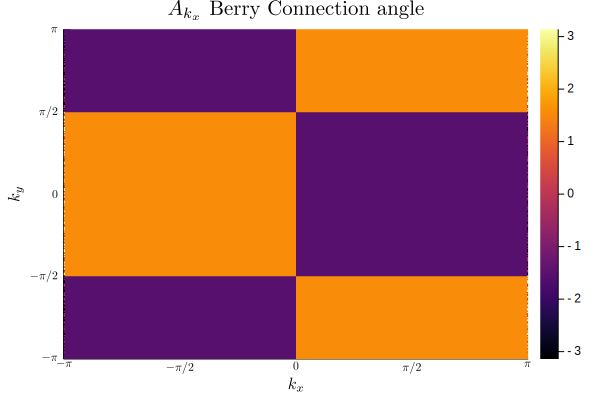

In [79]:
heatmap(ks,ks,angle.(Akxa))
plot!(xticks= (ticks,labels),
    yticks=(ticks,labels),
    xlabel=L"k_x",ylabel=L"k_y",
    title=L"A_{k_x} \textrm{ Berry Connection angle}")

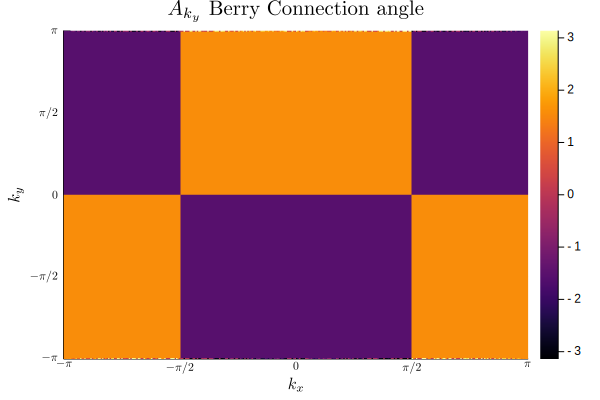

In [78]:
heatmap(ks,ks,angle.(Akya))
plot!(xticks= (ticks,labels),
    yticks=(ticks,labels),
    xlabel=L"k_x",ylabel=L"k_y",
    title=L"A_{k_y} \textrm{ Berry Connection angle}")

## Curvature 

I previously had a section here about Berry phases, but I need to fix it.  Until then, please believe the mass of physics literature that from the guage-dependent Berry connection, we can get a gauge independent quantity called the <i>Berry Curvature</i>.  Hopefully I can clarify this mathematical magic when I understand it myself.

Of course it's called Berry.  Every thing in this calculation is named after Berry.  At least its not Euler.  Done with side note, back to equations.
Here's our version of Gauss's Theorem:
\begin{equation}
\oint \mathcal{A} \cdot ds  = \iint F_{n}^{xy} d^2 k
\end{equation}

And $F_n^{xy}$ will take on this form:
\begin{equation}
F_{n}^{xy} = \nabla \times \mathcal{A} = \partial_{k_x} \mathcal{A}^y_{n} - \partial_{k_y} \mathcal{A}^x_{n} 
\end{equation}
\begin{equation}
= \partial_{k_x} \langle u | \partial_{k_y} u \rangle - \partial_{k_y} \langle u | \partial_{k_x} u \rangle
\end{equation}


TIME FOR MORE DERIVATIVES!

In [80]:
DRAmkx=kt->ForwardDiff.gradient(t->(real(Amkx(t))),kt )
DImAmkx=kt->ForwardDiff.gradient(t->(imag(Amkx(t))),kt )

DRAmky=kt->ForwardDiff.gradient(t->(real(Amky(t))),kt )
DImAmky=kt->ForwardDiff.gradient(t->(imag(Amky(t))),kt )

#29 (generic function with 1 method)

In [81]:
F(k)=DRAmky(k)[1]+im*DImAmky(k)[1]-DRAmkx(k)[2]-im*DImAmkx(k)[2]

F (generic function with 1 method)

In [82]:
Fa=Array{Complex{Float64}}(undef,l,l)
for ii in 1:l
    for jj in 1:l
        Fa[ii,jj]=F(ka[ii,jj])
    end
end

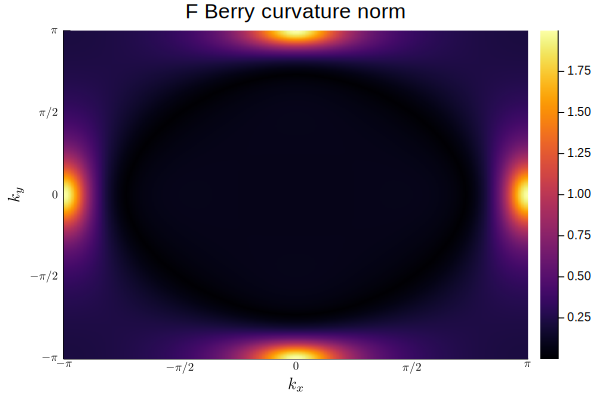

In [83]:
heatmap(ks,ks,abs.(Fa))
plot!(xticks= (ticks,labels),
    yticks=(ticks,labels),
    xlabel=L"k_x",ylabel=L"k_y",
    title="F Berry curvature norm")

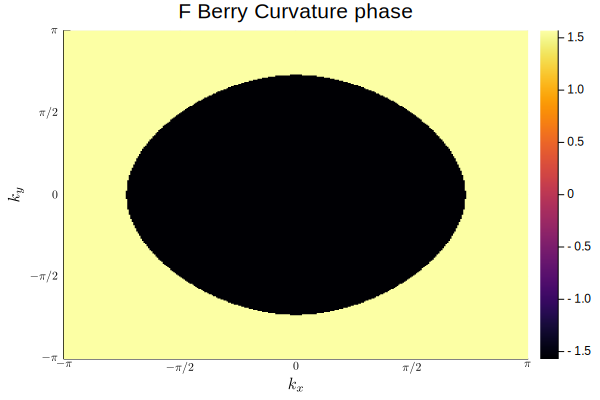

In [84]:
heatmap(ks,ks,angle.(Fa))
plot!(xticks= (ticks,labels),
    yticks=(ticks,labels),
    xlabel=L"k_x",ylabel=L"k_y",
    title="F Berry Curvature phase")

## Chern Number

Last Step!

Easy calculation now in terms of code, but this number has a great deal of significance.  I'm still trying to wrap my head around it.  The Chern number seems to pop up in a variety of obscure mathematical stuff over this physicist's head, but hopefully none of that is necessary to grasp its incredible mind-blowing usefullness.  

This single integer not only seperates out topological phases from topologically trivial phases, but seperates different topological phases from each other.  And always evaluates to an integer.  

\begin{equation}
Ch = \frac{1}{2 \pi i} \iint_{BZ} F^{xy}_n d^2 k
\end{equation}

If you don't get approximately an integer, try a finer mesh.  

In [85]:
sum(Fa)*(ks[2]-ks[1])^2/(2π*im)

1.0250189329637458 + 1.0118627829401277e-34im

## Victory !!!!!!!!!!

You made it!

Even if you didn't understand everything, or really understand much at all, pat yourself on the back.  This is the very frontier of science.

[1] Ching Kai Chiu, Jeffrey C.Y. Teo, Andreas P. Schnyder, and Shinsei Ryu, Classification of topological quantum matter with symmetries, Reviews of Modern Physics 88 2016, no. 3, 1–70.

@article{RevelsLubinPapamarkou2016,
    title = {Forward-Mode Automatic Differentiation in Julia},
   author = {{Revels}, J. and {Lubin}, M. and {Papamarkou}, T.},
  journal = {arXiv:1607.07892 [cs.MS]},
     year = {2016},
     url = {https://arxiv.org/abs/1607.07892}
}
